<a href="https://colab.research.google.com/github/Park-yonghoon/Capstone_Project/blob/master/Chp08_2_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                           

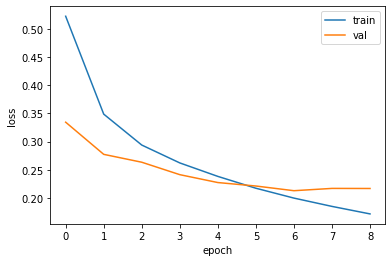

375/375 [==============================] - 6s 16ms/step - loss: 0.2131 - accuracy: 0.9221


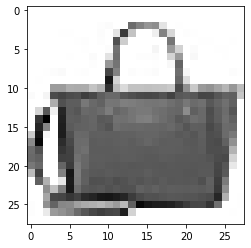

1/1 [==============================] - 0s 115ms/step
[[2.3797561e-20 8.6659162e-29 2.3665817e-22 5.7404218e-21 7.0402875e-22
  2.0860459e-17 8.8809527e-18 3.6951356e-17 1.0000000e+00 9.2087588e-20]]


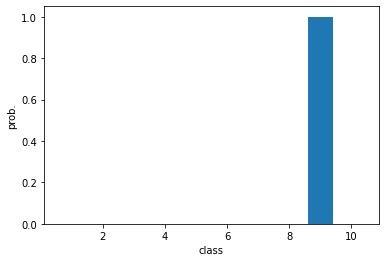

가방
313/313 [==============================] - 4s 13ms/step - loss: 0.2331 - accuracy: 0.9172


[0.23313800990581512, 0.9172000288963318]

In [ ]:
"""# 합성곱 신경망을 사용한 이미지 분류"""

"""## 패션 MNIST 데이터 불러오기"""

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

"""## 합성곱 신경망 만들기"""

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
          padding='same', input_shape=(28,28,1)))

model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
          padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

keras.utils.plot_model(model)

keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

"""## model compile & training"""

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

model.evaluate(val_scaled, val_target)

plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

preds = model.predict(val_scaled[0:1])
print(preds)

plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

import numpy as np
print(classes[np.argmax(preds)])

test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

model.evaluate(test_scaled, test_target)

## Keyword & Main point
- Tensorflow의 Conv2D, MaxPooling2D, plot_model를 활용한 실습을 했습니다.
## Main Package & Function
- Con2D는 입력의 너비와 높이 방향의 합성곱 연산을 구현한 클래스입니다.        첫 번째 매개변수는 합성곱 필터의 개수입니다.

   kernel_size 매개변수는 필터의 kernel 크기를 지정합니다. 가로세로 크기가 같은 경우 정수 하나로, 다른 경우 정수의 tuple로 지정할 수 있습니다. 일반적으로 커널의 가로세로 크기는 동일합니다. 커널의 깊이는 입력의 깊이와 동일하기 때문에 따로 지정하지 않습니다.

   strides 매개변수는 필터의 이동 간격을 지정합니다. 가로세로 크기가 같은 경우 정수 하나로, 다른 경우 정수의 튜플로 지정할 수 있습니다. 일반적으로 가로세로 stride 크기는 동일합니다. 기본값은 1입니다.

   padding 매개변수는 입력의 padding 타입을 지정합니다. 기본값 'valid'는 패딩을 하지 않습니다. 'same'은 합성곱 층의 출력의 가로세로 크기를 입력과 동일하게 맞추도록 입력에 패딩을 추가합니다.

   activation 매개변수는 합성곱 층에 적용할 활성화 함수를 지정합니다.

- MaxPooling2D는 입력의 너비와 높이를 줄이는 풀링 연산을 구현한 클래스입니다. 첫 번째 매개변수는 풀링의 크기를 지정하며, 가로세로 크기가 같은 경우 정수 하나로, 다른 경우 정수의 tuple로 지정할 수 있습니다. 일반적으로 풀링의 가로세로 크기는 같게 지정합니다.

  strides 매개변수는 풀링의 이동 간격을 지정합니다. 기본값은 풀링의 크기와 동일합니다. 즉 입력 위를 겹쳐서 풀링하지 않습니다.

  padding 매개변수는 입력의 패딩 타입을 지정합니다. 기본값 'valid'는 패딩을 하지 않습니다. 'same'은 합성곱 층의 출력의 가로세로 크기를 입력과 동일하게 맞추도록 입력에 패딩을 추가합니다.

- plot_model()은 케라스 모델 구조를 주피터 노트북에 그리거나 파일로 지정합니다. 첫 번째 매개변수에 케라스 모델 객체를 전달합니다.

  to_file은 매개변수에 파일 이름을 지정하면 그림을 파일로 저장합니다.

  show_shapes 매개변수를 True로 지정하면 층의 입력, 출력 크기를 표시합니다. 기본값은 False입니다.

  show_layer_names 매개변수를 True로 지정하면 층 이름을 출력합니다. 기본값이 True입니다.

  ## matplotlib
- bar()는 막대 그래프를 출력합니다.

  첫 번째 매개변수에 x축의 값을 리스트나 numpy 배열로 전달합니다.

  두 번째 매개변수에 y축의 값을 리스트나 numpy 배열로 전달합니다.
  
  width 매개변수에서 막대의 두께를 저장할 수 있습니다. 기본값은 0.8입니다.

